<h1><center>Laboratorio 9: Benchmark Estad√≠stico con Reddit üßÆ</center></h1>

<center><strong>MDS7202: Laboratorio de Programaci√≥n Cient√≠fica para Ciencia de Datos</strong></center>

### Cuerpo Docente:

- Profesor: Pablo Badilla
- Auxiliar: Ignacio Meza D.
- Ayudante: Constanza Pe√±a

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no ser√°n revisados

- Nombre de alumno 1: Francisca Sol√≠s
- Nombre de alumno 2: Javier Castro


### **Link de repositorio de GitHub:** `https://github.com/jignaciocastro8/lab-ciencia-datos`

# Temas a tratar

- Optimizaci√≥n de C√≥digo en Python.
- Utilizaci√≥n de librer√≠as para medir el tiempo de ejecuci√≥n de funciones.
- M√©todos para optimizar el rendimiento de las funciones.

# Reglas:

- Fecha de entrega: 3/12/2021
- **Grupos de 2 personas**
- **Ausentes** deber√°n realizar la actividad solos. 
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente ser√°n respondidos por este medio.
- Prohibidas las copias. 
- Pueden usar cualquer matrial del curso que estimen conveniente.

# Objetivos principales del laboratorio

- Obtener datos desde Reddit a partir de la librer√≠a `praw` y visualizar cuales post son m√°s probables que sean puntuados positivamente.
- Aplicar un atajo estad√≠stico para obtener la mean posterior de datos.
- Optimizar a trav√©s de librer√≠as funciones.

#Importamos librerias utiles üò∏

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
%%capture
#!pip install praw
#!pip install line_profiler
#!pip install numba

import sys
import praw
import time
import numpy as np
import pandas as pd
from numba import jit
import plotly.express as px
from functools import lru_cache
from IPython.core.display import Image

# 1. Recomendando Posts de Subreddit

<p align="center">
  <img src="https://styles.redditmedia.com/t5_2rer8/styles/bannerBackgroundImage_xzrb6my122181.jpg">
</p>

Unos intr√©pidos alumnos del curso, quienes frecuentemente participan en subreddits y foros de reviews, se preguntan lo siguiente: ¬øPodremos confiar que un post es bueno, si este tiene solamente 1 o 3 votos positivos?. los compa√±eros, creen que esto claramente no representa una opini√≥n general, ya que estamos mucho menos seguros acerca de la verdadera proporci√≥n de votos a favor de los comentarios con pocos datos. ¬øPero c√≥mo podemos obtener una representaci√≥n m√°s cre√≠ble para este problema?.

Lo se√±alado forma parte de un problema estad√≠sticos, donde a trav√©s del c√°lculo de la posterior se puede conocer que tan probable es que un post sea bueno. Para efectos de este laboratorio, no se exige un conocimiento previo para resolver este problema, simplemente se deber√° aplicar las ecuaciones presentadas m√°s adelante (De igual forma si quedan interesados sobre el tema se les invita a tomar el ramo [CC6104](https://github.com/dccuchile/CC6104)).

## 1.1 Obtenci√≥n de Subrredits y An√°lisis [1 Punto]

Para estudiar que tan probable es que un post sea positivo se comenzar√° cargando datos reales del subreddit chile desde reddit (si usted desea puede cambiar el subreddit a uno de su gusto). Para esto le proponemos la utilizaci√≥n de la funci√≥n que aparece mas abajo, la que presenta un usuario ya creado por el equipo docente. Dese un tiempo para entender que hace cada parte de la funci√≥n, visualizando que se obtiene de estas.

Revisada la funci√≥n, utilice un **perfilador** para monitorear el tiempo y memoria que les toma a cada liena de c√≥digo para ser ejecutada. Se√±ale cuales son los procesos que mas tiempo consumen en la ejecuci√≥n del C√≥digo, comentando si es posible mejorar el desempe√±o de la funci√≥n.

**TO-DO:**
- [ ] Estudiar la funci√≥n propuesta por el equipo docente.
- [ ] Estudiar los tiempos de ejecuci√≥n del c√≥digo a trav√©s de un perfilador.
- [ ] Estudiar la memoria ocupada por el c√≥digo a trav√©s de un perfilador.
- [ ] Comente los resultados. ¬øQu√© lineas ocupan m√°s memoria o m√°s/menos tiempo?¬øPor qu√©?

In [4]:
def praw_reddit(nombre_subreddit="chile", n_hot=1000):
    reddit = praw.Reddit(
        client_id="-w2hyFINxZ8T3g",
        client_secret="zGPCI4s3g6Ic6AsRi7vIpP0NoxbFdw",
        password="ClasesMDS7202",
        user_agent="Clases",
        username="DocenciaDataScience",
        check_for_async=False,
    )
    subreddit = reddit.subreddit(nombre_subreddit)

    votes, post, url = {}, {}, {}
    top_submissions = list(subreddit.hot(limit=n_hot))
    for it, top_n in enumerate(range(50, len(top_submissions), 50)):
        top_n_submissions = top_submissions[:top_n]
        upvotes, downvotes, url[it], post[it] = [], [], [], []

        for submission in top_n_submissions:
            try:
                ratio = submission.upvote_ratio
                ups = int(
                    round((ratio * submission.score) / (2 * ratio - 1))
                    if ratio != 0.5
                    else round(submission.score / 2)
                )
                upvotes.append(ups)
                downvotes.append(ups - submission.score)
                post[it].append(submission.title)
                url[it].append(submission.url)
            except Exception as e:
                continue
        votes[it] = np.array([upvotes, downvotes]).T
    return votes, post, url


In [5]:
votes, post, url = praw_reddit()

In [ ]:
###### C√≥digo Aqu√≠ ######
!pip install line_profiler
%load_ext line_profiler

distutils: c:\users\jigna\appdata\local\programs\python\python36\Include\UNKNOWN
sysconfig: c:\users\jigna\appdata\local\programs\python\python36\Include
user = False
home = None
root = None
prefix = None
distutils: c:\users\jigna\appdata\local\programs\python\python36\Include\UNKNOWN
sysconfig: c:\users\jigna\appdata\local\programs\python\python36\Include
user = False
home = None
root = None
prefix = None
You should consider upgrading via the 'c:\users\jigna\appdata\local\programs\python\python36\python.exe -m pip install --upgrade pip' command.


In [ ]:
%%timeit
praw_reddit()

15.9 s ¬± 446 ms per loop (mean ¬± std. dev. of 7 runs, 1 loop each)


In [ ]:
%lprun -T lprof1 -f praw_reddit praw_reddit()
print(open('lprof1', 'r').read())


*** Profile printout saved to text file 'lprof1'. 
Timer unit: 1e-07 s

Total time: 16.3204 s
File: <ipython-input-3-bd47716803a4>
Function: praw_reddit at line 1

Line #      Hits         Time  Per Hit   % Time  Line Contents
     1                                           def praw_reddit(nombre_subreddit="chile", n_hot=1000):
     2         1         19.0     19.0      0.0      reddit = praw.Reddit(
     3         1          8.0      8.0      0.0          client_id="-w2hyFINxZ8T3g",
     4         1          6.0      6.0      0.0          client_secret="zGPCI4s3g6Ic6AsRi7vIpP0NoxbFdw",
     5         1          6.0      6.0      0.0          password="ClasesMDS7202",
     6         1          6.0      6.0      0.0          user_agent="Clases",
     7         1          5.0      5.0      0.0          username="DocenciaDataScience",
     8         1       3493.0   3493.0      0.0          check_for_async=False,
     9                                               )
    10         1  

Timer unit: 1e-07 s

Total time: 16.3204 s
File: <ipython-input-3-bd47716803a4>
Function: praw_reddit at line 1

Line #      Hits         Time  Per Hit   % Time  Line Contents
     1                                           def praw_reddit(nombre_subreddit="chile", n_hot=1000):
     2         1         19.0     19.0      0.0      reddit = praw.Reddit(
     3         1          8.0      8.0      0.0          client_id="-w2hyFINxZ8T3g",
     4         1          6.0      6.0      0.0          client_secret="zGPCI4s3g6Ic6AsRi7vIpP0NoxbFdw",
     5         1          6.0      6.0      0.0          password="ClasesMDS7202",
     6         1          6.0      6.0      0.0          user_agent="Clases",
     7         1          5.0      5.0      0.0          username="DocenciaDataScience",
     8         1       3493.0   3493.0      0.0          check_for_async=False,
     9                                               )
    10         1        176.0    176.0      0.0      subreddit = reddi

In [ ]:
#!pip install -q praw
import praw

In [ ]:
%%file new_module.py
import praw
import numpy as np
def praw_reddit(nombre_subreddit="chile", n_hot=1000):
    reddit = praw.Reddit(
        client_id="-w2hyFINxZ8T3g",
        client_secret="zGPCI4s3g6Ic6AsRi7vIpP0NoxbFdw",
        password="ClasesMDS7202",
        user_agent="Clases",
        username="DocenciaDataScience",
        check_for_async=False,
    )
    subreddit = reddit.subreddit(nombre_subreddit)

    votes, post, url = {}, {}, {}
    top_submissions = list(subreddit.hot(limit=n_hot))
    for it, top_n in enumerate(range(50, len(top_submissions), 50)):
        top_n_submissions = top_submissions[:top_n]
        upvotes, downvotes, url[it], post[it] = [], [], [], []

        for submission in top_n_submissions:
            try:
                ratio = submission.upvote_ratio
                ups = int(
                    round((ratio * submission.score) / (2 * ratio - 1))
                    if ratio != 0.5
                    else round(submission.score / 2)
                )
                upvotes.append(ups)
                downvotes.append(ups - submission.score)
                post[it].append(submission.title)
                url[it].append(submission.url)
            except Exception as e:
                continue
        votes[it] = np.array([upvotes, downvotes]).T
    return votes, post, url

Overwriting new_module.py


In [ ]:
from new_module import praw_reddit

In [ ]:
#!pip install memory_profiler
%load_ext memory_profiler

The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler


In [ ]:
%mprun -f praw_reddit praw_reddit()

Filename: D:\Proyectos\lab-ciencia-datos\lab9\new_module.py

Line #    Mem usage    Increment  Occurences   Line Contents
     3    241.0 MiB    241.0 MiB           1   def praw_reddit(nombre_subreddit="chile", n_hot=1000):
     4    241.0 MiB      0.0 MiB           1       reddit = praw.Reddit(
     5    241.0 MiB      0.0 MiB           1           client_id="-w2hyFINxZ8T3g",
     6    241.0 MiB      0.0 MiB           1           client_secret="zGPCI4s3g6Ic6AsRi7vIpP0NoxbFdw",
     7    241.0 MiB      0.0 MiB           1           password="ClasesMDS7202",
     8    241.0 MiB      0.0 MiB           1           user_agent="Clases",
     9    241.0 MiB      0.0 MiB           1           username="DocenciaDataScience",
    10    241.0 MiB      0.0 MiB           1           check_for_async=False,
    11                                             )
    12    241.0 MiB      0.0 MiB           1       subreddit = reddit.subreddit(nombre_subreddit)
    13                                      

In [ ]:
#%memit praw_reddit()

peak memory: 242.20 MiB, increment: 1.06 MiB


**Respuesta:**

**¬øQu√© lineas ocupan m√°s memoria o m√°s/menos tiempo?¬øPor qu√©?**

Las l√≠neas que m√°s tiempo consumen son la 13,23,28 y 29. Con los siguientes valores: 162570962.0 ; 113087.0 ;  73078.0 ; 72805.0 . La l√≠nea 13 que es la que m√°s tiempo consume, por encima de todo el c√≥digo, se puede entender debido a que es la que analiza todos los datos recopilados para poder escoger los candidatos *top_submissions* . Mientra que las l√≠neas que menos tiempo consumen, corresponden a asignaciones de valor o procesos sencillos que ya est√°n escritos de la forma m√°s √≥ptima.

Respecto del consumo de memoria, el m√°ximo es de 255.8 [MiB] mientras que el m√≠nimo consumo de memoria que se observa es de 241.0 [MiB]. Y se observa que esto ocurre a partir de la l√≠nea 15, que es cuando se produce el incremento y esto es dado que se comienzan a recopilar los datos desde reddit para poder escoger los candidatos *top_submissions*.

## 1.2 LRU y An√°lisis de Tiempo con Cache [1 Punto]

Respondan las siguientes preguntas:

1.	¬øQu√© es la memoria cache y a que se refiere las siglas LRU?
2.	¬øCu√°les son los costos que tiene la aplicaci√≥n de t√©cnicas de Caching?
3. ¬øCu√°l es la consecuenc√≠a de ocupar caching en la funci√≥n anterior?.

Respondidas las preguntas, se le solicita que aplique alguna t√©cnica de caching para mejorar el desempe√±o de la funci√≥n `praw_reddit`. Para esto compare solo el tiempo de ejecuci√≥n del algoritmo con y sin caching, se√±alando el tiempo total de ejecuci√≥n y el tiempo promedio que le toma ejecutar cada loop a la funci√≥n. Con lo anterior, ¬øes posible visualizar mejoras en este caso?.


**TO-DO:**
- [ ] Responder las preguntas.
- [ ] Mejorar el c√≥digo con cache.
- [ ] Explicar las consecuencias de usar lru_cache sobre praw_reddit

**Respuestas Te√≥ricas:**

1. **¬øQu√© es la memoria cache y a que se refiere las siglas LRU?**

La memoria cache es un espacio de memoria que puede estar localizado en la RAM, disco de manera remota. Se utiliza para realizar un uso eficiente de la memoria y as√≠ mejorar el rendimiento de las aplicaciones. Normalmente, se dedica al almacenamiento de datos usados con mayor frecuencia, dado que permite una recuperaci√≥n a alta velocidad, este proceso de guardar datos y utilizarlos de forma directa se llama *memoizaci√≥n*.
LRU significa least recently used y su traducci√≥n directa ser√≠a, el menos recientemente utilizado.


2. **¬øCu√°les son los costos que tiene la aplicaci√≥n de t√©cnicas de Caching?**

El costo asociado a la aplicaci√≥n de t√©cnicas de caching es debido al aumento de consumo de memoria. Dependiendo de la localizaci√≥n de esta memoria, por ej si est√° ubicada en el disco, el acceso podr√≠a ser m√°s lento y as√≠ mermar el rendimiento.



3. **¬øCu√°l es la consecuenc√≠a de ocupar caching en la funci√≥n anterior?**

La consecuencia del uso de caching, fue una reducci√≥n el tiempo, por lo tanto, un aumento de rendimiento.











In [ ]:
from functools import lru_cache

In [ ]:
###### C√≥digo Aqu√≠ ######
@lru_cache(maxsize=None)

def praw_reddit(nombre_subreddit="chile", n_hot=1000):
    reddit = praw.Reddit(
        client_id="-w2hyFINxZ8T3g",
        client_secret="zGPCI4s3g6Ic6AsRi7vIpP0NoxbFdw",
        password="ClasesMDS7202",
        user_agent="Clases",
        username="DocenciaDataScience",
        check_for_async=False,
    )
    subreddit = reddit.subreddit(nombre_subreddit)

    votes, post, url = {}, {}, {}
    top_submissions = list(subreddit.hot(limit=n_hot))
    for it, top_n in enumerate(range(50, len(top_submissions), 50)):
        top_n_submissions = top_submissions[:top_n]
        upvotes, downvotes, url[it], post[it] = [], [], [], []

        for submission in top_n_submissions:
            try:
                ratio = submission.upvote_ratio
                ups = int(
                    round((ratio * submission.score) / (2 * ratio - 1))
                    if ratio != 0.5
                    else round(submission.score / 2)
                )
                upvotes.append(ups)
                downvotes.append(ups - submission.score)
                post[it].append(submission.title)
                url[it].append(submission.url)
            except Exception as e:
                continue
        votes[it] = np.array([upvotes, downvotes]).T
    return votes, post, url

In [ ]:
%%timeit
praw_reddit()

The slowest run took 10.50 times longer than the fastest. This could mean that an intermediate result is being cached.
486 ns ¬± 660 ns per loop (mean ¬± std. dev. of 7 runs, 1 loop each)


In [ ]:
!pip install line_profiler
%load_ext line_profiler

The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


In [ ]:
%lprun -T lprof2 -f praw_reddit praw_reddit()
print(open('lprof2', 'r').read())

/usr/local/lib/python3.7/dist-packages/line_profiler/line_profiler.py:344: UserWarning:

Could not extract a code object for the object <functools._lru_cache_wrapper object at 0x7f7160b84870>




*** Profile printout saved to text file 'lprof2'. 
Timer unit: 1e-06 s


**Respuesta de lru_cache sobre praw_reddit**

Para la funci√≥n sin lru se obtuvo un tiempo total de 16.3204 [s] per loop en cambio, para la funci√≥n con lru se obtuvo un tiempo de 486 ns ¬± 660 [ns], lo cual es much√≠simo menor. Por lo tanto, se aprecia, c√≥mo el utilizar la memoria cache permite un mejor desempe√±o al reducir el tiempo de ejecuci√≥n, debido a que tiene los datos m√°s frecuentes o recientemente utilizados almacenados para usarlos nuevamente.

## 1.3 Obtenci√≥n de Mean Posterior y Standard Error [1 Punto]

Una forma de obtener la mean posterior y el Standard Error de los datos de reddit es aplicando un atajo de inferencia estad√≠stica. Este atajo se define de la siguiente forma:

Sea **u** los votos positivos y **d** los votos negativos del subreddit, tendremos que:

$$a = 1+u$$

$$b = 1+d$$

$$\sigma= 1.65\sqrt(\dfrac{ab}{(a + b)^2(a + b + 1)})$$

$$\mu = \dfrac{a}{a+b}$$

Donde $\mu$ es la mean posterior y $\sigma$ el standard error.

Con lo anterior, genere dos funciones que tengan como salida $\mu$ y $\sigma$ de acuerdo a las ecuaciones se√±aladas. La primera funci√≥n, deber√° ser construida sin el uso de numpy, aplicando for y aplicando comandos nativos de Python. Por otro lado, deber√° generar una segunda funci√≥n con el uso exclusivo de numpy. **OJO** que las funciones deben tener como entrada solo un elemento del diccionario votes (por ejemplo `votes[1]`), por lo que estas no deben tener como entrada el conjunto completo de datos.

In [37]:
###### C√≥digo Aqu√≠ ######

# Funci√≥n sin np.

import math
def mean_std(votos):
    """
    Aplica f√≥rmula sin usar numpy pero s√≠ usando for.
    """
    votos = np.array(votos, dtype='int64')
    mu_arr, sig_arr = [], []
    for par in votos:
        u, d = par[0], par[1]
        a = 1 + u
        b = 1 + d
        num = a * b
        sig = 1.65 * math.sqrt(num / ((a + b + 1) * (a + b)**2))
        mu = a / (a + b)
        mu_arr.append(mu)
        sig_arr.append(sig)
    return mu_arr, sig_arr

@jit
def mean_std_jit(votos):
    """
    Aplica f√≥rmula sin usar numpy pero s√≠ usando for.
    """
    mu_arr, sig_arr = [], []
    for par in votos:
        u, d = par[0], par[1]
        a = 1 + u
        b = 1 + d
        num = a * b
        den = (a + b + 1) * (a + b)**2
        sig = 1.65 * math.sqrt(num / ((a + b + 1) * (a + b)**2))
        mu = a / (a + b)
        mu_arr.append(mu)
        sig_arr.append(sig)
    return mu_arr, sig_arr

# Funci√≥n con np.

def mean_std_np(votos):
    """
    Aplica f√≥rmula usando numpy.
    """
    u, d = np.array(votos[:,0], dtype='int64'), np.array(votos[:,1], dtype='int64')
    a = 1 + u
    b = 1 + d
    num = a * b
    den = (a + b + 1) * (a + b)**2
    sig = 1.65 * np.sqrt(num / den)
    mu = a / (a + b)
    return np.array(mu), np.array(sig)

@jit
def mean_std_np_jit(votos):
    """
    Aplica f√≥rmula usando numpy.
    """
    u, d = votos[:,0], votos[:,1]
    a = 1 + u
    b = 1 + d
    num = a * b
    den = (a + b + 1) * (a + b) **2
    sig = 1.65 * np.sqrt(num / den)
    mu = a / (a + b)
    return mu, sig

In [38]:
i = 3

mu_np, sig_np = mean_std_np(votes[i])
mu, sig = mean_std(votes[i])
mu_np_jit, sig_np_jit = mean_std_np_jit(votes[i])
mu_jit, sig_jit = mean_std_jit(votes[i])

# Mini test:
print(all(mu == mu_np))
print(all(sig == sig_np))
print(all(mu_jit == mu_np_jit))
print(all(sig_jit == sig_np_jit))

True
True
True
True


**Comentario**: existe un par de datos [up_votes, down_votes] para los cuales las funciones anteriores calculan un denominador negativo en la fracci√≥n que aparece dentro de la ra√≠z cuadrada de la definici√≥n de $\sigma$ elevando un error tipo "math domain error". Esto se debe a que el denominador calculado resulta muy grande para ser tipo int32 que Python por alguna raz√≥n lo hace un n√∫mero negativo. Esto no sucede cuando, como se muestra en las celdas de arriba, se calcula todo junto dentro de la ra√≠z. Lo mismo sucede en las funciones que usan Numpy, esto se resolvi√≥ especificando dtype como int64.

## 1.4 Comparaci√≥n de Rendimiento [2 Puntos]

Creadas las funciones de la secci√≥n 1.3, de forma iterativa compare los diferentes batches de datos que contiene el diccionario `votes`. Para esto genere un gr√°fico utilizando plotly, donde se pueda observar las diferencias de tiempo que toma ejecutar las diferentes cantidades de datos. ¬øes posible observar una diferencia? ¬øa qu√© se deber√° esto?.

Aplique el compilador **Numba** sobre las funciones 1.3 y compare el tiempo de ejecuci√≥n con los obtenidos sin el compilador. 

In [39]:
###### C√≥digo Aqu√≠ #####
def batch_time(jit=False):
    """
    Mide el tiempo que toma aplicar mean_std_np y mean_std_np
    sobre cada batch de datos en votes (con y sin numba).
    """
    con_np = []
    sin_np = []
    for batch_idx in votes:
        # Sin np.
        ti = time.time()
        if jit: 
            mean_std_jit(votes[batch_idx])
        else:
            #print(votes[batch_idx])
            mean_std(votes[batch_idx])
        tf = time.time()
        sin_np.append([votes[batch_idx].shape[0], tf - ti])
        # Con np.
        ti = time.time()
        if jit: 
            mean_std_np_jit(votes[batch_idx])
        else:
            mean_std_np(votes[batch_idx])
        tf = time.time()
        con_np.append([votes[batch_idx].shape[0], tf - ti])
    return np.array(con_np), np.array(sin_np)

# Obtenemos los tiempos de ejecuci√≥n.
con_np, sin_np = batch_time(jit=False)
con_np_jit, sin_np_jit = batch_time(jit=True)

# Agrupamos la data en dataframes (SIN JIT).
con_np = pd.DataFrame(con_np, columns=['Batch size', 'Time'])
con_np['Mode'] = ['Numpy'] * len(con_np)
sin_np = pd.DataFrame(sin_np, columns=['Batch size', 'Time'])
sin_np['Mode'] = ['Python'] * len(sin_np)

# Agrupamos la data en dataframes (CON JIT).
con_np_jit = pd.DataFrame(con_np_jit, columns=['Batch size', 'Time'])
con_np_jit['Mode'] = ['Numpy-JIT'] * len(con_np_jit)
sin_np_jit = pd.DataFrame(sin_np_jit, columns=['Batch size', 'Time'])
sin_np_jit['Mode'] = ['Python-JIT'] * len(sin_np_jit)

Ahora, grafiquen los tiempos tomados y comente los desempe√±os.

**Nota:** Ejecuten las funciones compiladas con alg√∫n ejemplo antes de graficar. De lo contrario, les indicar√° el tiempo de compilaci√≥n, cosa que no queremos medir

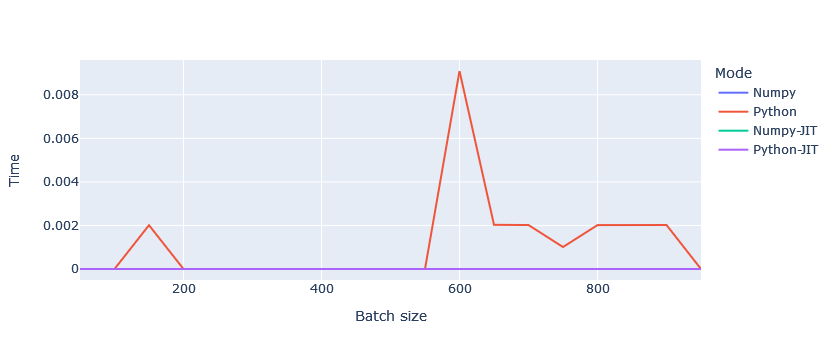

In [40]:
###### C√≥digo Aqu√≠ ######
df = pd.concat([con_np, sin_np, con_np_jit, sin_np_jit])
#df
px.line(df,x='Batch size', y='Time', color='Mode')


**Preguntas**: ¬øes posible observar una diferencia? ¬øa qu√© se deber√° esto?.

**Respuesta**: Aunque los tiempos obtenidos son bastante peque√±os, vemos que Python por si s√≥lo tarda m√°s tiempo que el resto de las opciones que cuentan con optimizaciones al c√≥digo entre las cuales no se observan diferencias. Esto √∫ltimo puede ser porque el procesador usado es muy poderoso.

Comentamos el gr√°fico "medicion_tiempos.html" subido a ucursos: Es esperable que la opci√≥n Python sea la m√°s lenta puesto que no cuenta con ning√∫n tipo de optimizaci√≥n y utiliza un ciclo for expl√≠cito. Luego, Numpy aparece como una opci√≥n un poco m√°s r√°pida porque utiliza la vectorizaci√≥n t√≠pica de los m√©todos Numpy. Por √∫ltimo, las versiones JIT de las opciones anteriores muestran el mejor desempe√±o con tiempos muy cercanos a 0 aunque como es de esperarse, Numpy-JIT siendo la versi√≥n m√°s optimizada, es la m√°s r√°pida. Al ser estas √∫ltimas mucho m√°s r√°pidas, podemos concluir que la mayor parte del tiempo se invierte en compilar.


## 1.5 Plot de Resultados [1 Punto]

Llego la hora de visualizar los resultados obtenidos, para esto solo ejecute las siguientes celdas y observe lo que sucede :3. ¬øQu√© logra observar de los resultados?, ¬øLa soluci√≥n resulta trivial?

En esta secci√≥n esperamos que solo comenten con lo que logran visualizar de los dataframes.

lower bounds aproximados:

Top 20 post ordenados por el limite inferior:

    Votos (+)  Votos (-)                                               Post  \
0         765          0  Ni√±os en la Vega Central de Santiago, septiemb...   
1         628          0  Mi viejo nos mando estas fotos de un visitante...   
2         474          0  ¬°Estamos de vuelta! Hace mucho tiempo que no p...   
3         442          0                      Pud√∫ en Ruta a Caleta Gonzalo   
4         318          0   Me encontr√© un tramoya de 31 minutos en la feria   
5         283          0                              Temuco a las 1:30 AM.   
6         278          0  Andando en bici me encontr√© a esta linda parej...   
7         238          0  Eclipse Solar desde la base chilena Glaciar Un...   
8         224          0  Chanchoman y La Mosca de Cachureos detr√°s de c...   
9         212          0  ‚ÄúVista general de Santiago, Chile, desde Apoqu...   
10        186          0  Municipalidad de Maip√∫

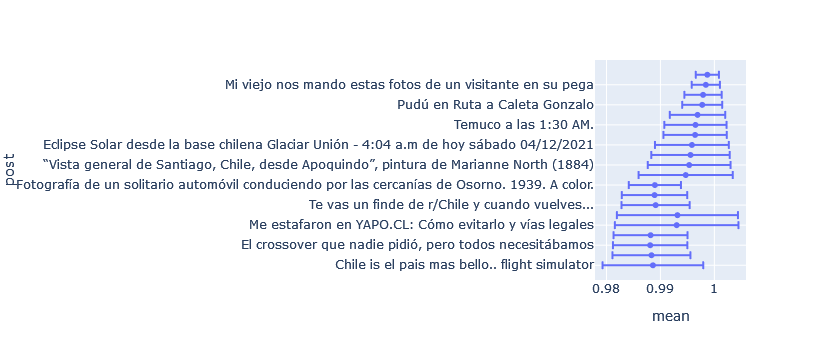

In [44]:
###### C√≥digo Aqu√≠ ######
votos = votes[len(votes) - 1]
posteo = post[len(post) - 1]
print("lower bounds aproximados:")

#posterior_mean, std_err = intervals_numpy(votos[:, 0], votos[:, 1])
posterior_mean, std_err = mean_std_np(votos)

lb = posterior_mean - std_err
print("\nTop 20 post ordenados por el limite inferior:\n")
order = np.argsort(-lb)
vote_post = {
    'Votos (+)': votos[order[:20], 0],
    'Votos (-)': votos[order[:20], 1],
    'Post': np.array(posteo)[order[:20]],
    'url': np.array(url[len(url) - 1])[order[:20]]
}
df = pd.DataFrame(data=vote_post)
print(df)
ordered_post = df.Post

r_order = order[::-1][-20:]
data_dic = {
    'mean': posterior_mean[r_order],
    'std_err': std_err[r_order],
    'post': ordered_post[::-1]
}
df = pd.DataFrame(data=data_dic)
fig = px.scatter(df, x="mean", y="post", error_x="std_err")
fig.show()

**Respuesta:**

De lo que logramos generar, vemos que el top 20 tiene probabilidades bastante altas de ser buenos posts y que sus desviaciones tambi√©n son relativamente peque√±as pensando en una escala de 0 a 1. Por otra parte, al observar el dataframe que nos muestra los up y down votes, se ve que la mayor√≠a tiene 0 down votes y/o una cantidad relativamente alta de up votes frente a down votes. Esto hace bastante sentido como respuesta pero tampoco es trivial puesto que las f√≥rmulas tambi√©n tienen su teor√≠a detras. 

<p align="center">
  <img src="https://media1.tenor.com/images/fb5bf7cc5a4acb91b4177672886a88ba/tenor.gif?itemid=5591338">
</p>